# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [2]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


In [3]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/SemanaTEC - Analitica"

else:
    # Define path del proyecto
    Ruta            = ""

# url string that hosts our .csv file
file_path = '/content/drive/MyDrive/SemanaTEC - Analitica/Iris.csv'

Mounted at /content/drive


# Importing data

In [5]:
# Dataset
df = pd.read_csv(file_path)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [7]:
df.columns
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


2. Drop rows with any missing values


In [10]:
df.dropna
df.notna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
145,True,True,True,True,True,True
146,True,True,True,True,True,True
147,True,True,True,True,True,True
148,True,True,True,True,True,True


3. Encoding the class label categorical column: from string to num


In [14]:
# Encoding the categorical column {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
species_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}

# Use the replace method to encode the 'Species' column
df['Flower'] = df['Species'].replace(species_mapping)
df.drop(['Species'], axis=1, inplace=True)

#Visualize the dataset
df.head()


<ipython-input-14-b42429287957>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Flower'] = df['Species'].replace(species_mapping)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Flower
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


Now the label/category is numeric


4. Discard columns that won't be used


In [ ]:
# If necesary, drop out non necesary columns


5. Scatter plot of the data

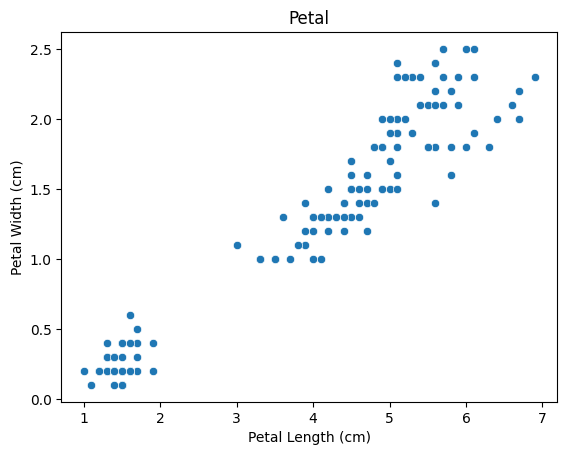

In [17]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal')
plt.show()

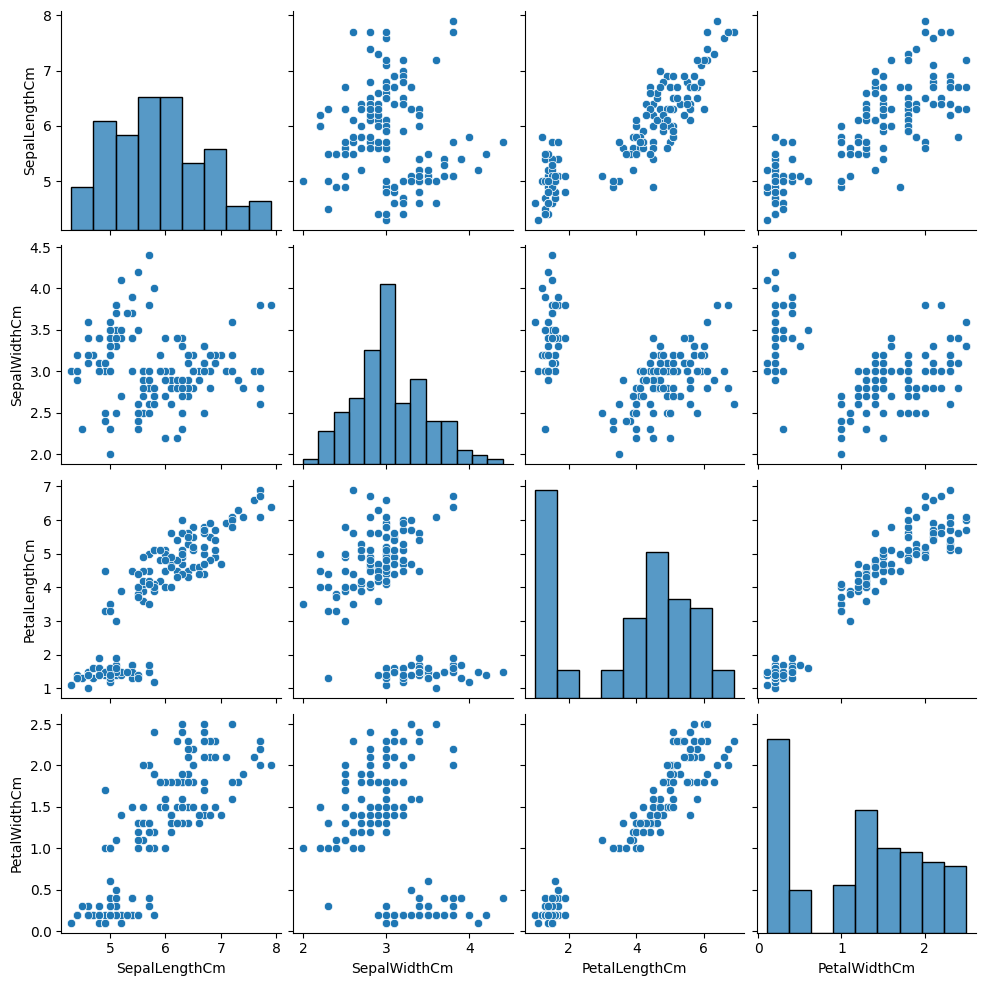

In [23]:
# Pairplot: Scatterplot of all variables
vars_to_plot = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
sns.pairplot(df[vars_to_plot])
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

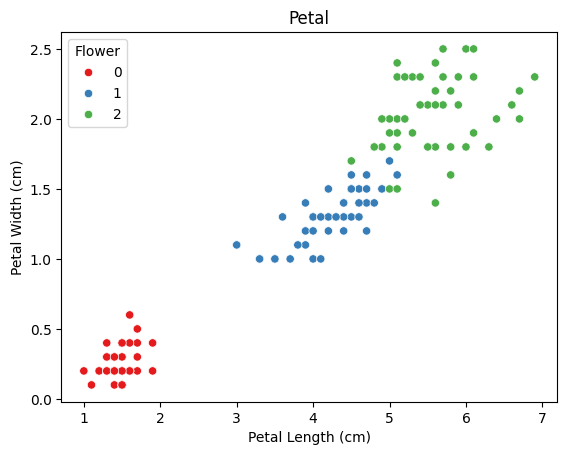

In [26]:
# Get dataframes for each real cluster
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Flower', data=df, palette='Set1')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal')
plt.show()


Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [40]:
# Import sklearn KMeans
from sklearn.cluster import KMeans
# Define number of clusters
n_clusters = 3
# Do K-means clustering (assing each point in the dataset to a cluster)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
X = df[['PetalLengthCm', 'PetalWidthCm']]
kmeans.fit(X)
# Print estimated cluster of each point in the dataset
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2]


NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [41]:
# Manual pairing the labels of the real and estimated clusters
cluster_labels = kmeans.labels_
df['cluster_estimated'] = cluster_labels
# Manually reassign labels
cluster_labels[:50] = 1
cluster_labels[50:100] = 0
cluster_labels[100:] = 2

In [42]:
# Add a new column to the dataset with the cluster information
df['cluster'] = cluster_labels

In [31]:
# Label of the estimated clusters

,cluster
0,1
1,1
2,1
3,1
4,1
...,...
145,2
146,2
147,2
148,2


In [32]:
# Cluster centroides
centroids = kmeans.cluster_centers_
print(centroids)


[[4.26923077 1.34230769]
 [1.464      0.244     ]
 [5.59583333 2.0375    ]]


In [33]:
# Sum of squared error (sse) of the final model
sse = kmeans.inertia_
print(sse)

31.38775897435898


In [34]:
# The number of iterations required to converge
n_iterations = kmeans.n_iter_
print(n_iterations)

3


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

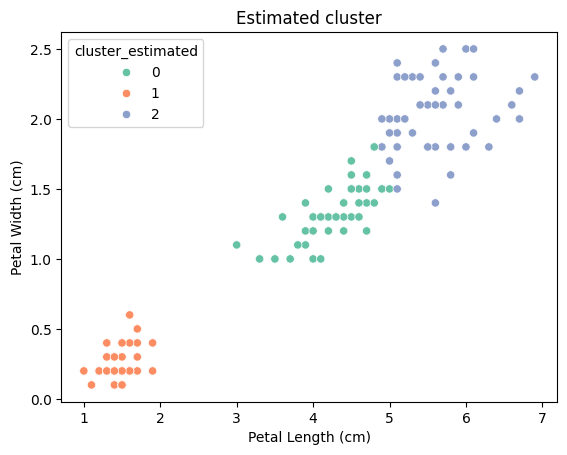

In [43]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='cluster_estimated', data=df, palette='Set2')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Estimated cluster')
plt.show()

## Plot both real and estimated clusters to check for errors

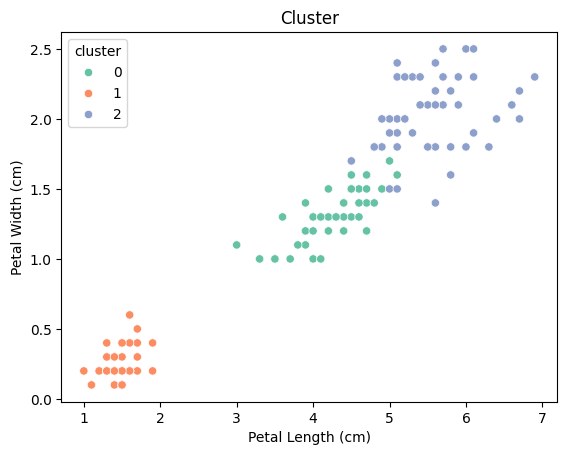

In [44]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='cluster', data=df, palette='Set2')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Cluster')
plt.show()


<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...
- Note that for K=4 ...

Concluir

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [45]:
# Intialize a list to hold sum of squared error (sse)
sse = []
# Define values of k
k_values = range(1, 6)
# For each k
for k in k_values:
    # Create a KMeans object with the current k
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit the model to the data
    kmeans.fit(X)  # Assuming 'X' contains your data for clustering

    # Append the SSE to the list
    sse.append(kmeans.inertia_)


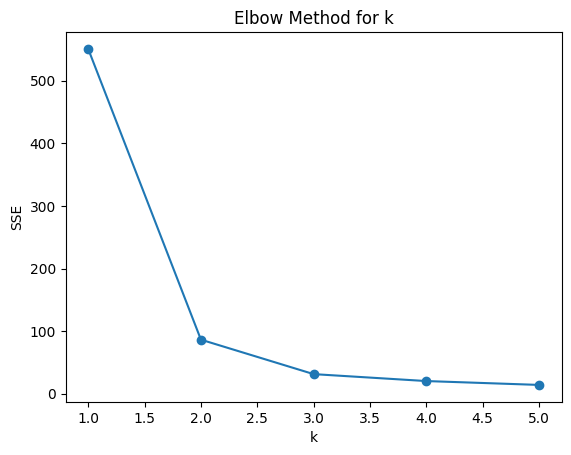

In [46]:
# Plot sse versus k
plt.plot(k_values, sse, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method for k')
plt.show()

Choose the k after which the sse is minimally reduced


# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k